In [50]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [51]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [52]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Tast 1

1. Plot histograms of mu, sigma and simulated height.

In [53]:
sigma = sim.stan_variable('sigma')
mu = sim.stan_variable('mu')
height = sim.stan_variable('height')

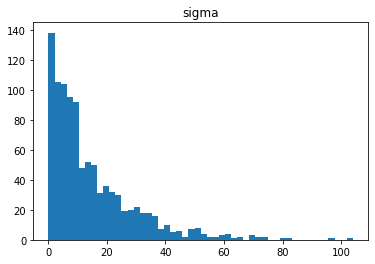

In [54]:
plt.hist(sigma, bins=50)
plt.title('sigma')
plt.show()

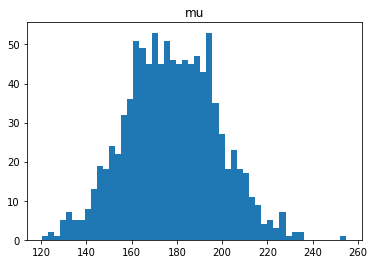

In [55]:
plt.hist(mu, bins=50)
plt.title('mu')
plt.show()

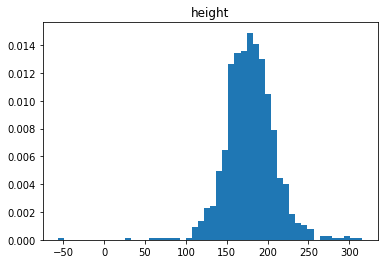

In [56]:
plt.hist(height, bins=50, density = True)
plt.title('height')
plt.show()

2. Plot a joint distribution of mu and sigma.

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

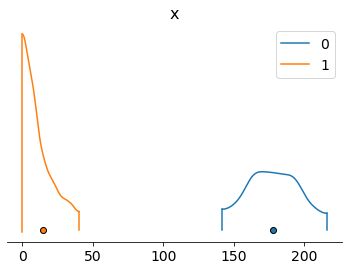

In [57]:
az.plot_density([mu, sigma])

Task 2. Model fit and evaluation

In [58]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [59]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |▍         | 00:00 Status
chain 2 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)A


chain 4 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 3 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 2 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [60]:
df = fit.summary()
print(df)

         Mean    MCSE  StdDev     5%    50%    95%   N_Eff  N_Eff/s  R_hat
name                                                                      
lp__   -900.0  0.0270    0.97 -900.0 -900.0 -900.0  1300.0   2600.0    1.0
mu      150.0  0.0071    0.40  150.0  150.0  160.0  3300.0   6600.0    1.0
sigma     7.8  0.0051    0.29    7.3    7.8    8.3  3300.0   6600.0    1.0
height  150.0  0.1200    7.70  140.0  150.0  170.0  3900.0   7800.0    1.0


1. Plot a joint distribution of fitted mu and sigma.

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

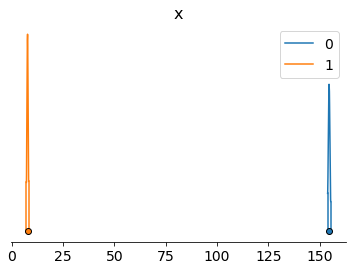

In [61]:
sigma_fit = fit.stan_variable('sigma')
mu_fit = fit.stan_variable('mu')
height_fit = fit.stan_variable('height')

az.plot_density([mu_fit, sigma_fit])

2. Plot histograms of data and simulated heights and evaluate the quality of model.

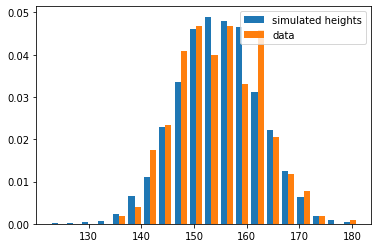

In [62]:
data_height = d.height
sim_height = fit.stan_variable('height')

plt.hist([sim_height,data_height], bins = 20, density = True)
plt.legend(['simulated heights','data'],loc='upper right')
plt.show()

Adding predictor to the model - weight

In [63]:
d['c_weight'] = d.weight - np.mean(d.weight)

In [64]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
print(data_sim)
sim=model_ppc.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


{'N': 50, 'weight': array([-13.91943352, -13.26797358, -12.61651364, -11.9650537 ,
       -11.31359376, -10.66213383, -10.01067389,  -9.35921395,
        -8.70775401,  -8.05629407,  -7.40483413,  -6.75337419,
        -6.10191425,  -5.45045432,  -4.79899438,  -4.14753444,
        -3.4960745 ,  -2.84461456,  -2.19315462,  -1.54169468,
        -0.89023474,  -0.23877481,   0.41268513,   1.06414507,
         1.71560501,   2.36706495,   3.01852489,   3.66998483,
         4.32144477,   4.9729047 ,   5.62436464,   6.27582458,
         6.92728452,   7.57874446,   8.2302044 ,   8.88166434,
         9.53312428,  10.18458421,  10.83604415,  11.48750409,
        12.13896403,  12.79042397,  13.44188391,  14.09334385,
        14.74480379,  15.39626373,  16.04772366,  16.6991836 ,
        17.35064354,  18.00210348])}


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Task 4. Prior predictive checks

1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [65]:
beta = sim.stan_variable('beta')
alpha = sim.stan_variable('alpha')

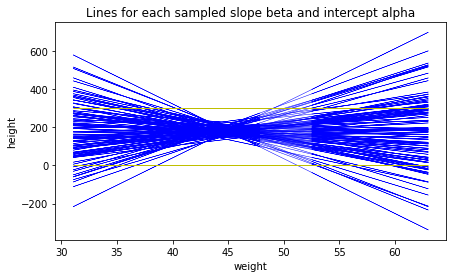

In [66]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

for i in range(100):
    axes.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axes.set_xlabel('weight')
axes.set_ylabel('height')
axes.hlines([0, 300],xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'y')

Modifying prior

In [67]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [68]:
sim_2b_ppc=model_ppc.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


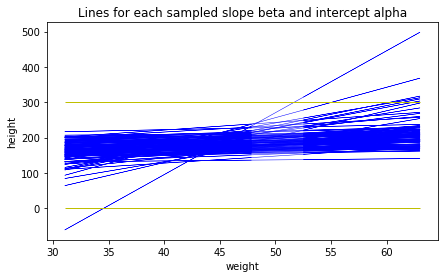

In [69]:
beta = sim_2b_ppc.stan_variable('beta')
alpha = sim_2b_ppc.stan_variable('alpha')
fig, axes = plt.subplots(1,1,figsize=(7,4))

for i in range(100):
    axes.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axes.set_xlabel('weight')
axes.set_ylabel('height')
axes.hlines([0, 300],xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'y')

For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot)

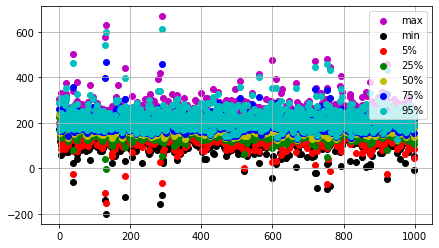

In [70]:
import numpy as np

sim_height = sim_2b_ppc.stan_variable('height')
x_list = [i for i in range (len(sim_height))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in sim_height:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

Fitting data

In [71]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [72]:
#Create data_fit dictionary containing data from N first rows of dataframe
from numpy import std
N = 150

d['s_weight'] = d['c_weight']/d['weight'].std()
d_short = d.head(N)
data_fit = dict(N= len(d_short),
                weight = d_short.s_weight.values,
                heights = d_short.height.values)
#print(data_fit)

In [73]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |▍         | 00:00 Status


chain 4 |▍         | 00:00 Status
chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 4 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)A
chain 2 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 4 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 4 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 3 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████ | 00:


INFO:cmdstanpy:CmdStan done processing.


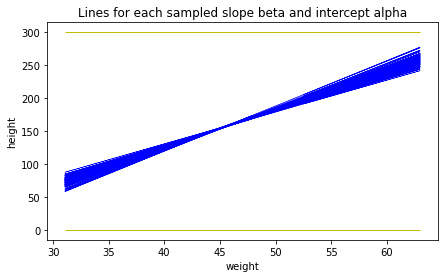

In [74]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')

fig, axes = plt.subplots(1,1,figsize=(7,4))

for i in range(100):
    axes.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axes.set_xlabel('weight')
axes.set_ylabel('height')
axes.hlines([0, 300],xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'y')

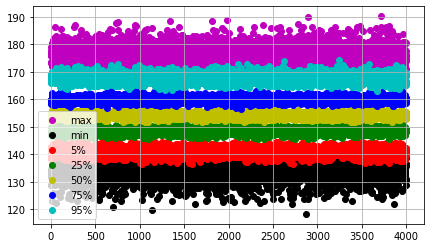

In [75]:
sim_height = fit.stan_variable('height')
x_list = [i for i in range (len(sim_height))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in sim_height:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()